In [1]:
    import numpy as np
    import matplotlib
    matplotlib.use('Agg')
    import seaborn as sns
    %matplotlib inline
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
def diff_2means_analysis(df_column1, df_column2):

    import numpy as np
    import matplotlib
    matplotlib.use('Agg')
    import seaborn as sns
    %matplotlib inline
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
    import warnings
    warnings.filterwarnings("ignore")

    # Convert potential string inputs from the columns to NaN and drop
    # missing values from the columns
    df_col1 = pd.to_numeric(df_column1, errors='coerce').dropna()
    df_col2 = pd.to_numeric(df_column2, errors='coerce').dropna()

    #assign the sample size of each sample to variables for later calculations
    n1 = len(df_col1)
    n2 = len(df_col2)

    # use np.std to find the standard deviation of the sample. The
    # ddof parameter must be set to one to get the sample standard deviation.
    # If it is not, you will be using the population standard deviation
    # which is not the correct estimator (the default ddof is 0, and we want
    # 1 degree of freedom for each column/series object)
    sd1 = np.std(df_col1, ddof = 1)
    sd2 = np.std(df_col2, ddof = 1)
    
    # calculate the standard error for the difference between two means
    se = np.sqrt((((n1-1)*(sd1**2)) + ((n2-1)*(sd2**2)))/(n1+n2-2)*((1/n1) + (1/n2)))
    
    
    # Next sm.stats will be used to ouptut a ztest statistic and p-value,
    # evaluating the strength of evidence for a difference in means, though
    # keep in mind this is for individual sets of data (not paired data).
    # The z-test should be run only if the sample size is above 30, otherwise
    # you may wish to modify this part of the function
    stats_obj_df1 = sm.stats.DescrStatsW(df_col1)
    stats_obj_df2 = sm.stats.DescrStatsW(df_col2)
    test_stat_value, pvalue = sm.stats.CompareMeans(stats_obj_df1, stats_obj_df2).ztest_ind(usevar='pooled')
    
    # Calculate a 95% confidence interval for the difference between means.
    # This is useful when the pvalue suggests we should reject the null hypothesis of equality,
    # and if 0 does not lie inside of the ci, this is an indication that the difference in means
    # is unlikely to be 0, which would be more evidence for the rejection of the null hypothesis.
    cm_obj = CompareMeans(d1=DescrStatsW(data=df_col1), d2=DescrStatsW(data=df_col2))
    lower, upper = cm_obj.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')
    bounds_diff = upper - lower
    
    # Print the values calculated so far .
    print(f'The estimated standard error of the difference between means is: {se.round(5)}')
    print(f'The z-test score is: {test_stat_value.round(5)}')
    print(f'The p-value is: {pvalue.round(5)}')
    print(f'The 95% confidence interval for the difference between means is: ({lower.round(5)}, {upper.round(5)})')
    print(f'The range of the confidence interval is: {bounds_diff.round(5)}')
    
    # Create simple stats summary tables for each function parameter (each of which should be a single column)
    description1 = print(f'Summary statistics for df1\n{df_col1.describe()}')
    description2 =  print(f'Summary statistics for df2\n{df_col2.describe()}')

    # Combine the data make a box and whisker plot, violin plot, line plot, and
    # overlapping distribution plot of the input parameters (the combined_df is made to allow for
    # proper labeling of the b&ws by column name in seaborn). The plots can
    # of course be modified with labels etc. for the data this function will
    # be run on.

    d = {'col1': df_col1, 'col2': df_col2}
    combined_df = pd.DataFrame(d)


    
    sns.set(rc={'figure.figsize':(7.7,7.27)})
    #fig, axs = plt.subplots(nrows=1)
    plt.show(sns.boxplot(data=combined_df))#, ax=axs[0])
    plt.show(sns.violinplot(data=combined_df))#, ax=axs[2])
    plt.show(sns.lineplot(data=combined_df))#, ax=axs[3])

    fig, axs = plt.subplots(ncols=1, figsize=(8,8))
    sns.distplot(a=[d.get('col1')], ax=axs)
    sns.distplot(a=[d.get('col2')], ax=axs)
    print(fig, axs)
    
    

    return se, test_stat_value, pvalue, lower, upper, bounds_diff

In [3]:
# run a test of the function by creating 2 columns and loading them with random numbers. Since this is just
# random data the plots won't mean anything, but since the colums have different ranges we can see how 
# real differences in data could be portrayed

test_df = pd.DataFrame({'col1': np.random.randint(100,size = 200).tolist(),
                        'col2': np.random.randint(170,size = 200).tolist()})
test1 = test_df['col1']
test2 = test_df['col2']

The estimated standard error of the difference between means is: 4.02795
The z-test score is: -7.62174
The p-value is: 0.0
The 95% confidence interval for the difference between means is: (-38.61872, -22.78128)
The range of the confidence interval is: 15.83744
Summary statistics for df1
count    200.000000
mean      46.685000
std       28.046547
min        0.000000
25%       25.000000
50%       43.000000
75%       69.000000
max       98.000000
Name: col1, dtype: float64
Summary statistics for df2
count    200.000000
mean      77.385000
std       49.580925
min        0.000000
25%       36.500000
50%       73.500000
75%      114.250000
max      169.000000
Name: col2, dtype: float64


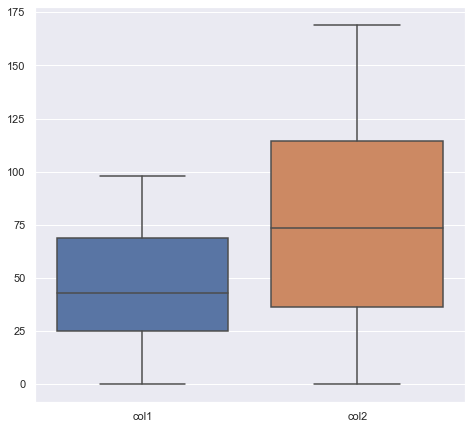

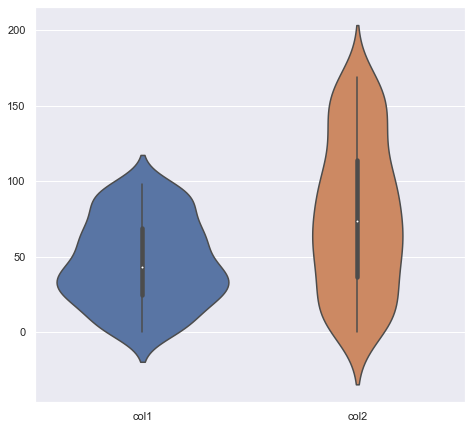

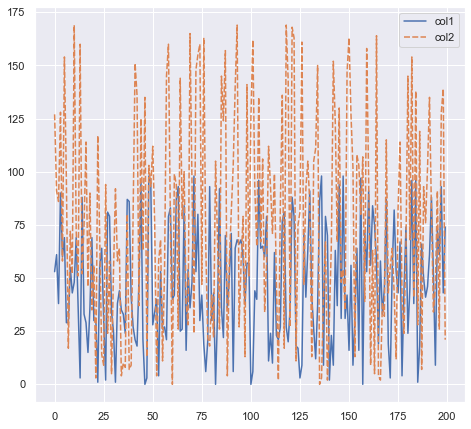

Figure(576x576) AxesSubplot(0.125,0.125;0.775x0.755)


(4.027950430847783,
 -7.62174225504022,
 2.5027439560904216e-14,
 -38.6187182308818,
 -22.78128176911821,
 15.837436461763588)

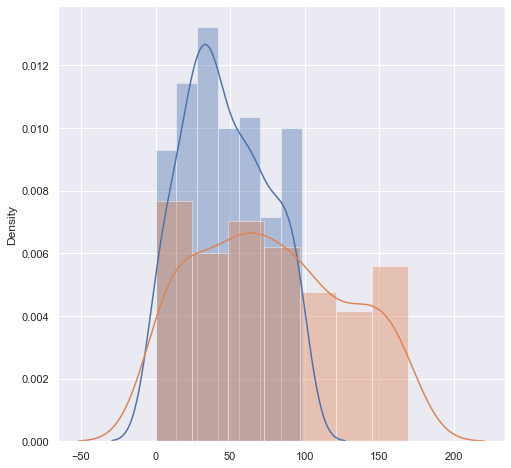

In [4]:
diff_2means_analysis(test1, test2)